In [1]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
# XML files were downloaded from:
# https://projects.propublica.org/nonprofits/organizations/990272261
# Note there is more data, but it would involve typing by hand.

with open('2009.xml', 'r') as f: xml2009 = f.read()
with open('2010.xml', 'r') as f: xml2010 = f.read()
with open('2011.xml', 'r') as f: xml2011 = f.read()    
with open('2012.xml', 'r') as f: xml2012 = f.read()    
with open('2013.xml', 'r') as f: xml2013 = f.read()
with open('2014.xml', 'r') as f: xml2014 = f.read()    
with open('2015.xml', 'r') as f: xml2015 = f.read()
with open('2016.xml', 'r') as f: xml2016 = f.read()
with open('2017.xml', 'r') as f: xml2017 = f.read()
with open('2018.xml', 'r') as f: xml2018 = f.read()
with open('2019.xml', 'r') as f: xml2019 = f.read()    
with open('2020.xml', 'r') as f: xml2020 = f.read()

In [3]:
# It's bad form. But for now, we remove the namespace to make
# the files more readable.  Create element trees.

ns = 'xmlns="http://www.irs.gov/efile"'
return2009 = ET.fromstring(xml2009.replace(ns, ''))
return2010 = ET.fromstring(xml2010.replace(ns, ''))
return2011 = ET.fromstring(xml2011.replace(ns, ''))
return2012 = ET.fromstring(xml2012.replace(ns, ''))
return2013 = ET.fromstring(xml2013.replace(ns, ''))
return2014 = ET.fromstring(xml2014.replace(ns, ''))
return2015 = ET.fromstring(xml2015.replace(ns, ''))
return2016 = ET.fromstring(xml2016.replace(ns, ''))
return2017 = ET.fromstring(xml2017.replace(ns, ''))
return2018 = ET.fromstring(xml2018.replace(ns, ''))
return2019 = ET.fromstring(xml2019.replace(ns, ''))
return2020 = ET.fromstring(xml2020.replace(ns, ''))

In [4]:
# The IRS appears to have changed nameing convvensions after 2012.
# When reading data, there are two group of files to consider.

returns2009_2012 = [return2009, return2010, return2011, return2012]
returns2013_2020 = [return2013, return2014, return2015, return2016, 
                    return2017, return2018, return2019, return2020]

In [ ]:
root = return2020

head = root.find('ReturnHeader')
data = root.find('ReturnData/IRS990')

ET.dump(data)

In [17]:
# Get data from trees.  This is mainly and exercise in selecting and renaming.
# Output is a list of dictionaries.

list0 = []
for root in returns2009_2012:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')

    year =    head.find('TaxYear').text
    officer = data.find('CompCurrentOfficersDirectors/Total').text
    other =   data.find('OtherSalariesAndWages/ProgramServices').text
    tuition = data.find('ProgramServiceRevenue/'
                        '[Description="TUITION AND FEES"]/'
                        'TotalRevenueColumn').text

    for person in data.findall('Form990PartVIISectionA'):
        title = person.find('Title').text
        if title in ['PRESIDENT', 'PRESIDENT/EX OFFICIO', 'PRESIDENT/EX-OFFICIO']:
            pres = person.find('ReportableCompFromOrganization').text
    
    dic = OrderedDict()
    dic['Year'] =        year
    dic['OfficerPay'] =  officer
    dic['OtherPay'] =    other
    dic['PresPay'] =     pres
    dic['TuitionFees'] = tuition
    
    list0.append(dic)
     
for root in returns2013_2020:
    head = root.find('ReturnHeader')
    data = root.find('ReturnData/IRS990')
    
    year =    head.find('TaxYr').text
    officer = data.find('CompCurrentOfcrDirectorsGrp/TotalAmt').text
    other =   data.find('OtherSalariesAndWagesGrp/ProgramServicesAmt').text
    tuition = data.find('ProgramServiceRevenueGrp/'
                        '[Desc="TUITION AND FEES"]/'
                        'TotalRevenueColumnAmt').text

    for person in data.findall('Form990PartVIISectionAGrp'):
        title = person.find('TitleTxt').text
        if title in ['PRESIDENT', 'PRESIDENT/EX OFFICIO', 'PRESIDENT/EX-OFFICIO']:
            pres = person.find('ReportableCompFromOrgAmt').text
        
    dic = OrderedDict()
    dic['Year'] =        year
    dic['OfficerPay'] =  officer
    dic['OtherPay'] =    other
    dic['PresPay'] =     pres
    dic['TuitionFees'] = tuition
    
    list0.append(dic)
    
display(list0)

[OrderedDict([('Year', '2009'),
              ('OfficerPay', '280320'),
              ('OtherPay', '12077140'),
              ('PresPay', '0'),
              ('TuitionFees', '29604040')]),
 OrderedDict([('Year', '2010'),
              ('OfficerPay', '416792'),
              ('OtherPay', '13110834'),
              ('PresPay', '0'),
              ('TuitionFees', '33490360')]),
 OrderedDict([('Year', '2011'),
              ('OfficerPay', '424961'),
              ('OtherPay', '14686197'),
              ('PresPay', '0'),
              ('TuitionFees', '38009011')]),
 OrderedDict([('Year', '2012'),
              ('OfficerPay', '439429'),
              ('OtherPay', '16431606'),
              ('PresPay', '0'),
              ('TuitionFees', '39480661')]),
 OrderedDict([('Year', '2013'),
              ('OfficerPay', '554895'),
              ('OtherPay', '17059903'),
              ('PresPay', '0'),
              ('TuitionFees', '41595597')]),
 OrderedDict([('Year', '2014'),
              ('Officer

In [8]:
# Creat dataframe and set types. 

df0 = pd.DataFrame(list0)
df0 = df0.astype({
    'Year':        'datetime64',
    'OfficerPay':  'int64',
    'OtherPay':    'int64',
    'PresPay':     'int64',
    'TuitionFees': 'int64'})

display(df0)

,Year,OfficerPay,OtherPay,PresPay,TuitionFees
0,2009-01-01,280320,12077140,0,29604040
1,2010-01-01,416792,13110834,0,33490360
2,2011-01-01,424961,14686197,0,38009011
3,2012-01-01,439429,16431606,0,39480661
4,2013-01-01,554895,17059903,0,41595597
5,2014-01-01,617878,16735885,0,43851841
6,2015-01-01,649330,17047625,0,43802588
7,2016-01-01,637204,17890327,0,43840228
8,2017-01-01,1104073,16847363,202086,45206577
9,2018-01-01,1748990,17026731,426124,44840457


In [9]:
# Prepare data for plotting. Make tidy, give more descriptive names, and order.

dic = OrderedDict()
dic['OfficerPay'] =  'Compensation of officers,\nkey employees, etc.'
dic['OtherPay'] =    'Other salaries and wages:\nProgram service expenses'
dic['PresPay'] =     'Compensation of president'
dic['TuitionFees'] = 'Tuition and fees'

df0_plot = df0.melt(id_vars='Year', var_name='Data', value_name='Dollars')
df0_plot = df0_plot.dropna(axis=0)
df0_plot['Data'] = df0_plot['Data'].replace(dic)
df0_plot['Data'] = df0_plot['Data'].astype('category')
df0_plot['Data'] = df0_plot['Data'].cat.reorder_categories(dic.values())

# display(df0_plot)

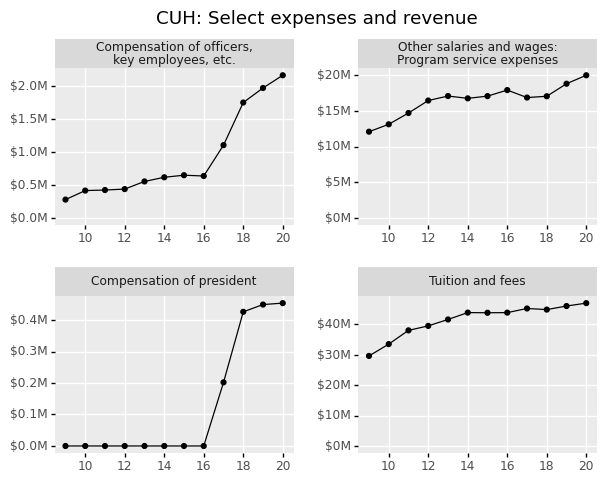

<ggplot: (8786254416803)>

In [10]:
# Plot

def y_label(xs):
    if max(xs)/1e6 < 10: return [f'${x/1e6:.1f}M' for x in xs]
    else:                return [f'${x/1e6:.0f}M' for x in xs]

p0  = p9.ggplot(data=df0_plot, mapping= p9.aes(x='Year', y='Dollars'))
p0 += p9.facet_wrap('Data', ncol=2, scales = 'free')
p0 += p9.geom_point()
p0 += p9.geom_line()
p0 += p9.ggtitle('CUH: Select expenses and revenue')
p0 += p9.theme(figure_size=(7, 5))
p0 += p9.theme(subplots_adjust={'hspace': 0.45, 'wspace': 0.27})
p0 += p9.aes(xmin=pd.Timestamp('2009-1-1'), ymin=0)
p0 += p9.xlab('') + p9.ylab('')
p0 += p9.scale_x_datetime(
    breaks=date_breaks('2 years'),
    labels=date_format('%y'),
    minor_breaks=[])
p0 += p9.scale_y_continuous(
    labels= y_label,
    minor_breaks=[])

display(p0)

In [11]:
# Get percent change since start.

df1 = pd.DataFrame()
df1['Year'] =        df0['Year']
df1['OfficerPay'] =  df0['OfficerPay']
df1['MinusPay'] =    df0['OfficerPay'] - df0['PresPay']
df1['OtherPay'] =    df0['OtherPay']
df1['TuitionFees'] = df0['TuitionFees']

df1 = df1.set_index('Year')
df1 = (df1/df1.iloc[0] - 1)*100
df1 = df1.reset_index()

display(df1)

,Year,OfficerPay,MinusPay,OtherPay,TuitionFees
0,2009-01-01,0.000000,0.000000,0.000000,0.000000
1,2010-01-01,48.684361,48.684361,8.559096,13.127668
2,2011-01-01,51.598530,51.598530,21.603269,28.391297
3,2012-01-01,56.759775,56.759775,36.055440,33.362409
4,2013-01-01,97.950557,97.950557,41.257806,40.506488
5,2014-01-01,120.418807,120.418807,38.574903,48.127894
6,2015-01-01,131.638841,131.638841,41.156143,47.961521
7,2016-01-01,127.313071,127.313071,48.133805,48.088666
8,2017-01-01,293.861658,221.770477,39.497952,52.704080
9,2018-01-01,523.926227,371.912814,40.983138,51.467357


In [12]:
# Prepare data for plotting. Make tidy, give more descriptive names, and order.

dic = OrderedDict()
dic['OfficerPay'] =  'Compensation of officers,\nkey employees, etc.'
dic['MinusPay'] =    'Compensation of officers\nminus president'
dic['OtherPay'] =    'Other salaries and wages:\nProgram service expenses'
dic['TuitionFees'] = 'Tuition and fees'
    
df1_plot = df1.melt(id_vars='Year', var_name='Data', value_name='Dollars')
df1_plot['Data'] = df1_plot['Data'].replace(dic)
df1_plot['Data'] = df1_plot['Data'].astype('category')
df1_plot['Data'] = df1_plot['Data'].cat.reorder_categories(dic.values())

# display(df1_plot)

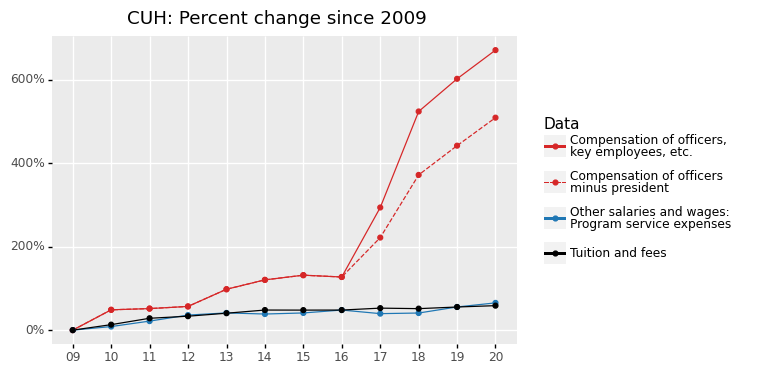

<ggplot: (8786220924320)>

In [13]:
p1  = p9.ggplot(data=df1_plot, mapping= p9.aes(
    x='Year', y='Dollars', color='Data', linetype='Data'))
p1 += p9.geom_line()
p1 += p9.geom_point()
p1 += p9.ggtitle('CUH: Percent change since 2009')
p1 += p9.theme(figure_size=(6, 4))
p1 += p9.xlab('') + p9.ylab('')
p1 += p9.scale_x_datetime(
    breaks=date_breaks('1 years'),
    labels=date_format('%y'),
    minor_breaks=[])
p1 += p9.scale_y_continuous(
    labels=lambda xs: [f'{x:.0f}%' for x in xs],
    minor_breaks=[])
p1 += p9.theme(legend_entry_spacing=8)
p1 += p9.scale_color_manual(values=['tab:red', 'tab:red', 'tab:blue', 'black'])
p1 += p9.scale_linetype_manual(values=['solid', 'dashed', 'solid', 'solid'])

display(p1)

In [15]:
# Prepare data for plotting. Make tidy, give more descriptive names, and order.

dic = OrderedDict()
dic['OtherPay'] =    'Other salaries and wages:\nProgram service expenses'
dic['TuitionFees'] = 'Tuition and fees'
    
df2_plot = df2.melt(id_vars='Year', var_name='Data', value_name='Dollars')
df2_plot['Data'] = df2_plot['Data'].replace(dic)
df2_plot['Data'] = df2_plot['Data'].astype('category')
df2_plot['Data'] = df2_plot['Data'].cat.reorder_categories(dic.values())

# display(df2_plot)

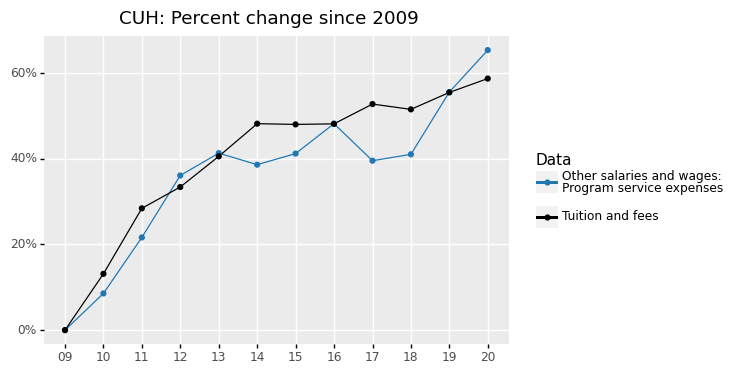

<ggplot: (8786220926377)>

In [16]:
p2  = p9.ggplot(data=df2_plot, mapping= p9.aes(
    x='Year', y='Dollars', color='Data', linetype='Data'))
p2 += p9.geom_line()
p2 += p9.geom_point()
p2 += p9.ggtitle('CUH: Percent change since 2009')
p2 += p9.theme(figure_size=(6, 4))
p2 += p9.xlab('') + p9.ylab('')
p2 += p9.scale_x_datetime(
    breaks=date_breaks('1 years'),
    labels=date_format('%y'),
    minor_breaks=[])
p2 += p9.scale_y_continuous(
    labels=lambda xs: [f'{x:.0f}%' for x in xs],
    minor_breaks=[])
p2 += p9.theme(legend_entry_spacing=8)
p2 += p9.scale_color_manual(values=['tab:blue', 'black'])
p2 += p9.scale_linetype_manual(values=['solid', 'solid'])

display(p2)